# Unstructured Data Analytics HW1

Name: Wenjia Hu

Andrew ID: Wenjiah

Collaborators： I used some chatGPT to search for libraries and code syntax. 

Reminder: you should not be sharing code.

**Reminder:** As stated in Lecture 1, homework assignments this semester will be submitted as PDFs and, in particular, we will not be re-running your code. Please make sure that you have run all your code cells so that the code cell outputs are actually displayed. To save your Jupyter notebook as a PDF, we recommend simply using your browser's print functionality and using that to print/save the notebook as a PDF.

**Warning: make sure your compute environment is set up first.** This homework assignment assumes that you have already installed Anaconda Python 3 and spaCy. Instructions for installing these are part of the tutorial [here](https://www.andrew.cmu.edu/user/georgech/95-865/Anaconda,%20Jupyter,%20and%20spaCy%20setup%20tutorial.pdf).

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). Roughly speaking, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to check whether Zipf's law holds for a real dataset of text documents.

The dataset we look at is a collection of the 100 most popular books downloaded from the [Gutenburg Project](https://www.gutenberg.org/browse/scores/top). These 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

```python
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
```

**(a) Warm-up/basic Python review [15 pts across subparts].** This part serves as a warm-up, getting you familiar with the kind of code we will be writing in this class. Note that throughout part (a), your code should **not** be using spaCy.

**Subpart i [5 pts].** Write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`; this is just counting the number of characters).

**Please do not actually print out the contents of each book since many of the books are extremely long, and by printing out all the books' contents, you'll end up creating a Jupyter notebook that has a massive file size.**

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

Your output should look like (although there should be 100 books rather than 3 as shown below; also, the ordering of the books might be different on your machine):

```
./HW1_Dataset/War and Peace by graf Leo Tolstoy (251).txt 3227580
./HW1_Dataset/Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt 1148435
./HW1_Dataset/Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt 441034
```

In [1]:
import os
import pandas as pd
from tqdm import tqdm

In [10]:
# Write a loop that iterates through all 100 books; 
path =  '/Users/cmu-work/Code/CMU Class Code/95865_unstructure_data_analysis/HW1/HW1_Dataset'

# list all files in the directory   
files = os.listdir(path)

#print file name and file length
for book in files:
    print(book)
    book_path = path + '/' + book
    with open(book_path, 'r') as f:
        text = f.read()
    print(len(text))  

War and Peace by graf Leo Tolstoy (251).txt
3227580
Democracy in America — Volume 1 by Alexis de Tocqueville (147).txt
1148435
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (501).txt
441034
The King James Version of the Bible (132).txt
4351846
Et dukkehjem. English by Henrik Ibsen (557).txt
161241
Outpost in the Wilderness_ Fort Wayne, 1706-1828 by Charles Poinsatte (161).txt
363234
The Romance of Lust_ A Classic Victorian erotic novel by Anonymous (294).txt
1051148
The Odyssey by Homer (124).txt
697404
A History of Spanish Literature by James Fitzmaurice-Kelly (109).txt
765918
The Philosophy of Spiritual Activity by Rudolf Steiner (144).txt
545031
My Fifteen Lost Years by Florence Elizabeth Maybrick (499).txt
383694
Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt
1154508
The History of the Peloponnesian War by Thucydides (122).txt
1200021
Gulliver's Travels into Several Remote Nations of the World by Jonathan Swift (136).txt
600105
The Peddle

**Subpart ii [5 pts].** Copy and paste your code from **subpart i** into the code cell below. Then in the code cell below, modify the code so that it prints out the top 15 longest books (in terms of raw string length, which is what you had already computed). In particular, please write your code so that the printout is of the following format:

```
1. <number of characters in longest text file> <filename of longest text file>
2. <number of characters in 2nd longest text file> <filename of 2nd longest text file>
...
15. <number of characters in 15th longest text file> <filename of 15th longest text file>
```

Note: only print out information for the top 15 books in the format above; please do not repeat printing what we asked you to print in **subpart i**.

In [14]:
# Write a loop that iterates through all 100 books; 
path =  '/Users/cmu-work/Code/CMU Class Code/95865_unstructure_data_analysis/HW1/HW1_Dataset'

# list all files in the directory   
files = os.listdir(path)

df = pd.DataFrame(columns=['book_name', 'book_length'])
#print file name and file length
for book in files:
    book_path = path + '/' + book
    with open(book_path, 'r') as f:
        text = f.read()

    data = pd.DataFrame({'book_name': book, 'book_length': len(text)}, index=[0])

    # meger data
    df = pd.concat([df, data], ignore_index=True)
     

In [18]:
# sort by book_length
df = df.sort_values(by='book_length', ascending=False)

#reset index
df = df.reset_index(drop=True)

In [20]:
# print out the top 15 books in the format <number of characters in longest text file> <filename of longest text file>
for i in range(15):
    print(df['book_length'][i], df['book_name'][i])

5465100 The Complete Works of William Shakespeare by William Shakespeare (132).txt
4351846 The King James Version of the Bible (132).txt
3254333 Les Misérables by Victor Hugo (165) (Unicode Encoding Conflict).txt
3227580 War and Peace by graf Leo Tolstoy (251).txt
3033575 Essays of Michel de Montaigne — Complete by Michel de Montaigne (205).txt
2643849 The Count of Monte Cristo, Illustrated by Alexandre Dumas (160).txt
1534140 Ulysses by James Joyce (282).txt
1378627 My Secret Life, Volumes I. to III. by Anonymous (157).txt
1238569 Moby Dick; Or, The Whale by Herman Melville (413).txt
1231784 Leviathan by Thomas Hobbes (417).txt
1214387 The Republic by Plato (246).txt
1200021 The History of the Peloponnesian War by Thucydides (122).txt
1175588 The Iliad by Homer (256).txt
1167141 The Federalist Papers by Alexander Hamilton and John Jay and James Madison (116).txt
1154508 Prestuplenie i nakazanie. English by Fyodor Dostoyevsky (160).txt


**Subpart iii [5 pts].** You should find that some of the books are quite long. Processing very long books will be problematic with spaCy, so we will want to chop up long books into pieces. Note that later on in the course, we shall see that chopping up large amounts of data into small pieces or "batches" is in fact quite common in machine learning since for massive datasets, we often cannot store them in their entirety on a CPU or GPU for processing all at once.

As a toy example, suppose that a book's text is `'cat dog shark spam eggs'` and we want to split it up into batches where each batch has at most 3 words. Then we could split up the book's text into two batches/pieces: `'cat dog shark'` and `'spam eggs'`.

We have provided code for you to do this below.

In [21]:
import numpy as np

def split_into_batches(book_text, max_num_words_per_batch):
    words_split_on_spaces = book_text.split(' ')
    num_book_pieces = int(np.ceil(len(words_split_on_spaces) / max_num_words_per_batch))
    batches = []
    for piece_idx in range(num_book_pieces):
        start_idx = piece_idx * max_num_words_per_batch
        end_idx = (piece_idx + 1) * max_num_words_per_batch
        if end_idx > len(words_split_on_spaces):
            end_idx = len(words_split_on_spaces)
        book_piece = ' '.join(words_split_on_spaces[start_idx:end_idx])
        batches.append(book_piece)
    return batches

print(split_into_batches('cat dog shark spam eggs', 3))

['cat dog shark', 'spam eggs']


Now write a loop that goes through all 100 books again. However, for each book, split it up into batches so that each batch has at most 10000 words. In this case, how many batches are there total across all 100 books? Please write code that computes this number of batches. Your code should print out the following (with the correct total number of batches):

```
Total number of batches: <total number of batches across all 100 books>
```

In [28]:
total_batch = 0
for book in tqdm(files):
    book_path = path + '/' + book
    with open(book_path, 'r') as f:
        text = f.read()
        result = split_into_batches(text, 10000)
        total_batch += len(result)

print ('Total number of batches: ', total_batch)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:01<00:00, 54.48it/s]

Total number of batches:  1246


**(b) [10 pts]** Now we will finally use spaCy. Note that for this problem, you don't actually need `spaCy`'s named entity recognition or grammatical parsing. Turning these elements off when you instantiate the `nlp` object can substantially speed up your code. To make sure these are off when instantiating the `nlp` object, call: 

```python
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
```

**Throughout this problem, do not remove stopwords.**

Build a term frequency (raw counts) table that is for all 100 books. Specifically, building on your solution to part (a)-subpart iii, read in a single book at a time and for each book, do the following:

  1. Split it up into batches where each batch has at most 10000 words.
  2. For each batch:
    1. Process the batch by separating and lemmatizing the words
    2. Count the number of times each lemma appears and add these to the frequency table. For simplicity, **do not convert lemmas to lowercase**. (Note that we use raw counts as the "frequency"--do not do any division.) Also, as we explain below, we will only count lemmas that are alphabetic.

Note that just as we had said in part (a): do **not** print out the complete contents of every book since doing so will result in a Jupyter notebook file that is massive.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the lemmas, only include lemmas that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

```python
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
```

In [29]:
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')

tesla consists only of alphabetic letters!


In [31]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# test 1
# test_doc = nlp('cat dog shark spam eggs will.i.am Tesla')

# for token in test_doc:
#     if re.match('[a-zA-Z]+$', token.lemma_):
#         if token.lemma_ in test_freq_table:
#             test_freq_table[token.lemma_] += 1
#         else:
#             test_freq_table[token.lemma_] = 1

# print(test_freq_table)

In [ ]:
# Test 2
# # Build a term frequency (raw counts) table for test_path

# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# test_freq_table = {}
# #make a empty dictionary

# test_path
# with open(book_path, 'r') as f:
#     text = f.read()
#     result = split_into_batches(text, 10000)
#     for batch in tqdm(result):
#         doc = nlp(batch)
#         for token in doc:
#             if re.match('[a-zA-Z]+$', token.lemma_):
#                 if token.lemma_ in test_freq_table:
#                     test_freq_table[token.lemma_] += 1
#                 else:
#                     test_freq_table[token.lemma_] = 1

In [40]:
# Build a term frequency (raw counts) table for test_path

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

test_freq_table = {}
#make a empty dictionary

for book in tqdm(files):
    book_path = path + '/' + book
    with open(book_path, 'r') as f:
        text = f.read()
        result = split_into_batches(text, 10000)
        for batch in result:
            doc = nlp(batch)
            for token in doc:
                if re.match('[a-zA-Z]+$', token.lemma_):
                    if token.lemma_ in test_freq_table:
                        test_freq_table[token.lemma_] += 1
                    else:
                        test_freq_table[token.lemma_] = 1

100%|██████████| 100/100 [13:51<00:00,  8.31s/it]


In [42]:
# save the dictionary to a csv file
df_freq = pd.DataFrame(list(test_freq_table.items()), columns=['lemma', 'count'])
df_freq.to_csv('test_freq_table.csv', index=False)


**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

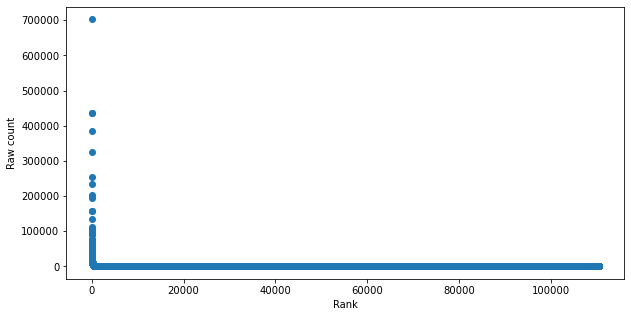

In [43]:
# Raw scatter plot with the frequency table
import matplotlib.pyplot as plt
import numpy as np

# Load the frequency table
df_freq = pd.read_csv('test_freq_table.csv')

# Sort the frequency table by count
df_freq = df_freq.sort_values(by='count', ascending=False)

# Reset the index
df_freq = df_freq.reset_index(drop=True)

# # Plot the raw scatter plot
# plt.figure(figsize=(10, 5))
# plt.scatter(np.arange(len(df_freq)), df_freq['count'])
# plt.xlabel('Rank')
# plt.ylabel('Raw count')
# plt.show()




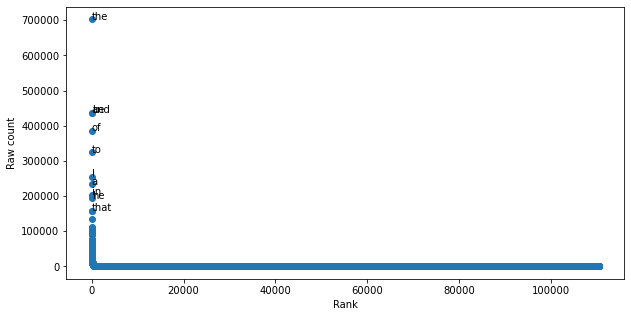

In [46]:
# add lables to top 10 words
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(len(df_freq)), df_freq['count'])
plt.xlabel('Rank')
plt.ylabel('Raw count')
for i in range(10):
    plt.annotate(df_freq['lemma'][i], (i, df_freq['count'][i]))
plt.show()

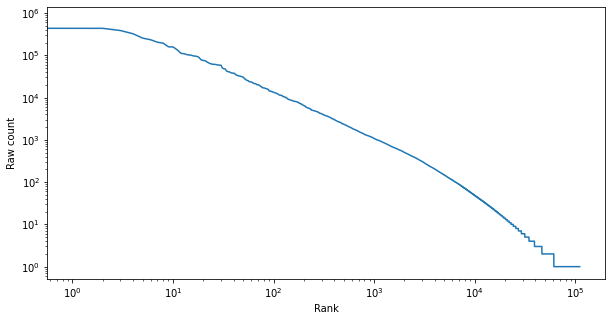

In [48]:
# make log log plot

plt.figure(figsize=(10, 5))

# Convert to a numpy array before indexing instea of using pandas indexing
x = np.arange(len(df_freq))
y = df_freq['count'].to_numpy()

plt.loglog(x, y)

plt.xlabel('Rank')
plt.ylabel('Raw count')

plt.show()


**(d) [10 pts across subparts]** Let's now try to make sense of the very last plot in part **(c)**. Zipf's law states that term frequency is governed by a power law, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant that is approximately 0.1*(corpus size) for English.

Please answer the following questions:

**Subpart i [2 pts].** What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): 
I observed that in the log-log plot, the distribution of word frequencies also adheres to the power law. The negative linear correlation between the raw count and rank in the log-log plot suggests that the distribution of word frequencies follows this power law.

**Subpart ii [4 pts].** Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphabetic words; thus what remains in the bag are actually alphabetic lemmas). What is the probability of drawing one of the 4 most frequent alphabetic lemmas? What is the probability of drawing one of the 50 most frequent alphabetic lemmas? Answer these two questions using code rather than just entering in the final answers as numbers.

In [51]:
print('Probability of drawing one of the 4 most frequent alphabetic lemmas: ')
# find out the probability of drawing one of the 4 most frequent alphabetic lemmas
print(df_freq['count'][0:4].sum() / df_freq['count'].sum())

print('Probability of drawing one of the 50 most frequent alphabetic lemmas: ')
# find out the probability of drawing one of the 50 most frequent alphabetic lemmas
print(df_freq['count'][0:50].sum() / df_freq['count'].sum())

Probability of drawing one of the 4 most frequent alphabetic lemmas: 
0.16224400336116176
Probability of drawing one of the 50 most frequent alphabetic lemmas: 
0.48310940071723874


**Subpart iii [4 pts].** What proportion of the alphabetic lemmas occur only once? What proportion of the alphabetic lemmas occur fewer than 10 times?

In [54]:
print("Occur only once: ")
# find out the proportion of alphabetic lemmas that occur only once
print(df_freq[df_freq['count'] == 1].shape[0] / df_freq.shape[0])

print("Occur fewer than 10 times: ")
# find out the proportion of alphabetic lemmas that occur fewer than 10 times
print(df_freq[df_freq['count'] < 10].shape[0] / df_freq.shape[0])

Occur only once: 
0.44752296068407005
Occur fewer than 10 times: 
0.7815500158349545


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

```python
import nltk
nltk.download('reuters')
```

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing. Hence, you will want to instantiate the nlp object by calling:

```python
nlp = spacy.load('en_core_web_sm', disable=['parser'])
```


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
from tqdm import tqdm
import numpy as np
import pandas as pd

import nltk
nltk.download('reuters')
nlp = spacy.load('en_core_web_sm', disable=['parser'])

[nltk_data] Downloading package reuters to /Users/cmu-
[nltk_data]     work/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [3]:

nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in tqdm(reuters_fileids)]


  0%|          | 0/10788 [00:00<?, ?it/s]/Users/cmu-work/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 10788/10788 [02:27<00:00, 73.33it/s]


In [8]:
# cacluate the number of entities in each category
all_ent = []

for doc in tqdm(reuters_nlp):
    for ent in doc.ents :
        all_ent.append(ent.label_)

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 10788/10788 [00:00<00:00, 32647.80it/s]


In [9]:
label_counter = Counter(all_ent)

In [170]:
# turn the label_counter dictionary into a dataframe
# df = pd.DataFrame(list(label_counter.items()), columns=['label', 'count'])

# # seppearate the label column into two columns: label_text and label_type
# df['label_text'] = df['label'].apply(lambda x: x[0])
# df['label_type'] = df['label'].apply(lambda x: x[1])

# # drop the label column
# df = df.drop(columns=['label'])
# df 

# # order by count
# df = df.sort_values(by='count', ascending=False)
# df = df.reset_index(drop=True)
# df

# sum up the count for each label type
# df_sum = df.groupby('label_type').sum()
# df_sum = df_sum.reset_index()
# df_sum

,count,label_text,label_type
0,4,ASIAN,NORP
1,3907,U.S.,GPE
2,1291,Japan,GPE
3,32,Asia,LOC
4,14,Reuter,PERSON
...,...,...,...
64575,1,"5,167,573",CARDINAL
64576,1,"1,251,337",CARDINAL
64577,1,AUTOMOTIVE TECHNOLOGIES CORP,ORG
64578,1,"1,916,000",CARDINAL


In [13]:
import numpy as np

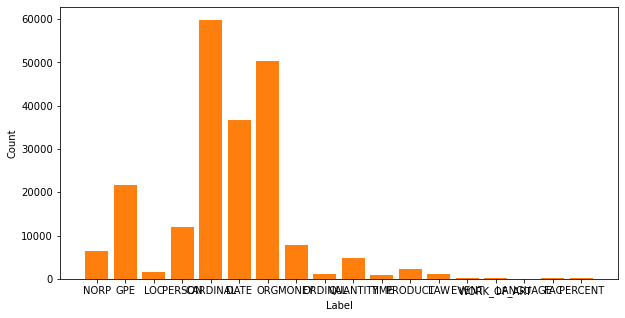

In [19]:
# draw a bar plot for counter object
plt.figure(figsize=(10, 5))

elements = label_counter.keys()
counts = label_counter.values()

# Create a bar chart
plt.bar(elements, counts)

plt.bar(x, y)

plt.xlabel('Label')
plt.ylabel('Count')

# plt.xticks(np.arange(len(label_counter)), label_counter)

plt.show()


**(b) [15 pts]** Now list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization). Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectively. **In both cases, please convert the entity names to lowercase first before computing the top 10.**

Here, when counting the (raw count) frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.

In [34]:
# cacluate the number of entities in each category
all_ent = []

for doc in tqdm(reuters_nlp):

    for ent in doc.ents :
        all_ent.append((ent.text.lower(), ent.label_))

label_counter = Counter(all_ent)


  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 10788/10788 [00:00<00:00, 15043.90it/s]


In [36]:
# turn the label_counter dictionary into a dataframe
df = pd.DataFrame(list(label_counter.items()), columns=['label', 'count'])

# seppearate the label column into two columns: label_text and label_type
df['label_text'] = df['label'].apply(lambda x: x[0])
df['label_type'] = df['label'].apply(lambda x: x[1])

# drop the label column
df = df.drop(columns=['label'])

In [38]:
#  list the top 10 most frequently occurring entities (entity text and the number of occurence) with label `ORG` (organization)
for item in df[df['label_type'] == 'ORG'][0:10]['label_text']:
    print(item.lower())

matsushita electric industrial co ltd &lt;mc.t
broker &lt;james capel and co
the u.s. threat
u.s. products
u.s. retaliation
textile exporters &lt;taiwan safe group
the federation of hong kong industry
liberal democratic party
international trade and industry
miti


In [39]:
# Separately list the top 10 most frequently occurring entities with label `GPE` (geopolitical entity such as countries, cities, states) respectivel
for item in df[df['label_type'] == 'GPE'][0:10]['label_text']:
    print(item.lower())

u.s.
japan
tokyo
taiwan
south korea's
south korea
malaysia
hong kong
hong kong's
canberra


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? **Just like in the previous part, please convert entity names to lowercase in your analysis.**

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [4]:
# cacluate the number of entities in each category
all_ent = []
index = 0

for doc in tqdm(reuters_nlp):

    for ent in doc.ents :
        all_ent.append((ent.text.lower(), ent.label_,index))
    index += 1

label_counter = Counter(all_ent)

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 10788/10788 [00:00<00:00, 15805.71it/s]


In [5]:
df = pd.DataFrame(list(label_counter.items()), columns=['label', 'count'])

# seppearate the label column into two columns: label_text and label_type
df['label_text'] = df['label'].apply(lambda x: x[0])
df['label_type'] = df['label'].apply(lambda x: x[1])
df['index'] = df['label'].apply(lambda x: x[2])

# drop the label column
df = df.drop(columns=['label'])

In [6]:
# identify all the GPE entities
all_gpe = df[df['label_type'] == 'GPE']['label_text'].to_list()

#identify all ORG entities
all_org = df[df['label_type'] == 'ORG']['label_text'].to_list()

# identify the index list
all_index = df['index'].unique().tolist()

In [7]:
# shorten df to only include GPE and ORG
df = df[(df['label_type'] == 'GPE') | (df['label_type'] == 'ORG')]

In [8]:
# find unique value for all_gpe
all_gpe = list(set(all_gpe))
all_org = list(set(all_org))

In [9]:
# initialize a dataframe with one column for each index and one row for each GPE entity
df_gpe = pd.DataFrame(columns=np.arange(len(reuters_nlp)), index=all_gpe)
# set the variable type as binary
df_gpe = df_gpe.fillna(0)

# initialize a dataframe with one column for each index and one row for each ORG entity
df_org = pd.DataFrame(columns=np.arange(len(reuters_nlp)), index=all_org)
df_org = df_org.fillna(0)


In [10]:
for index_num in tqdm(range(10787)):
    all_label_in_indexed_doc = df[df['index'] == index_num]['label_text'].to_list()
    for gpe_label in all_gpe:
        if gpe_label in all_label_in_indexed_doc:
            df_gpe[index_num][gpe_label] = 1

100%|██████████| 10787/10787 [03:41<00:00, 48.73it/s]


In [11]:
# save index
df_gpe['index'] = df_gpe.index
df_gpe.to_csv('df_gpe.csv')

<ipython-input-11-3042107162eb>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_gpe['index'] = df_gpe.index


In [12]:
for index_num in tqdm(range(10787)):
    all_label_in_indexed_doc = df[df['index'] == index_num]['label_text'].to_list()
    for org_label in all_org:
        if org_label in all_label_in_indexed_doc:
            df_org[index_num][org_label] = 1

100%|██████████| 10787/10787 [09:43<00:00, 18.50it/s]


In [13]:
# save 
df_org.to_csv('df_org.csv')

In [14]:
# remove the index column of df_gpe 
df_gpe = df_gpe.drop(columns=['index'])


In [15]:
# create a dataframe whose row is GPE and column is ORG
df_gpe_org = pd.DataFrame(columns=all_org, index=all_gpe)
df_gpe_org = df_gpe_org.fillna(0)

In [39]:
df_gpe.shape

(1852, 10788)

In [40]:
df_org.shape

(20465, 10788)

In [41]:
len(all_gpe)

1852

In [42]:
# create a empty numpy array
gpe_org_matrix = np.zeros((len(all_gpe), len(all_org)))

In [44]:
gpe_org_matrix.shape

(1852, 20465)

In [46]:
# convert df_gpe to numpy array
gpe_matrix = df_gpe.to_numpy()

# convert df_org to numpy array
org_matrix = df_org.to_numpy()


In [47]:
gpe_matrix.shape

(1852, 10788)

In [68]:
# find the index for OPEC
all_org.index('opec')

opec_row = df_org.iloc[8188].to_numpy()
opec_mean = opec_row.mean()

In [69]:
result_list = []

for i in tqdm(range(len(all_gpe))):
    gpe_row = gpe_matrix[0]
    dot = np.dot(gpe_row, opec_row.T)
    result = dot/(gpe_row.mean() * opec_mean)
    result_list.append(result)




100%|██████████| 1852/1852 [00:00<00:00, 5865.79it/s]


In [74]:
result_list= np.array(result_list)

In [75]:
# find the index of top 50 values in the result_list

top_50_index = np.argsort(result_list)[-50:]


In [77]:
# print the top 50 GPE entities
for index in top_50_index:
    print(all_gpe[index])

canton
subotica
south australia
ivory coast
deleware
minstar
vertex
guangxi
mountain states
san bernardino county
rouen
announce
mississippi
allegheny county
boston
schuykill county
tonnes
buffton
hunt valley
minn
healy
west malaysia
the united states-iraq business forum
zentralsparkasse
uruguay
scottsboro
turkey
new york state's
morning
cebu
mayaguez
nra
koether
d.c.
indonesia
orlando
madagascar
canada
dominican republic
rocky mount
belzberg
shelby
west) germany
independence
merlin
ill.
u.s. autoparts
comstock
moscow
demerara


In [ ]:
# find the highest top 50 value in the matrix



Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***

### [Problem 3] Questionnaire [5 pts]

Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/8heZamsAnE8S7VTWA